# Part-A


### Data Exploration

1. Load the dataset and display the first few rows to understand its structure.
2. Summarize the dataset to check:
   - Number of rows and columns.
   - Data types of each column.
   - Presence of missing values.
3. Visualize the target class distribution to understand the balance of the dataset.


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# set seed for reproducibility
import numpy as np

np.random.seed(485)

# warning ignore
import warnings

warnings.filterwarnings("ignore")


train_data = pd.read_csv("Dataset-train-vf.csv")
train_data.head()

,sample,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y
0,1,1353,NaN,1.142857,88,104.850,0.00727,0.443,7.997,6.990,8346.00,3.9,0.032695,0.05,C1,Low
1,2,1107,NaN,4.857143,306,194.175,0.03778,0.363,34.002,12.945,376.64,11.1,0.210526,3.15,C3,Low
2,3,984,NaN,6.571429,368,208.575,0.05750,0.356,46.000,13.905,451.54,13.1,0.271930,3.10,C1,Low
3,4,1107,NaN,4.714286,297,175.725,0.03667,0.354,33.003,11.715,393.76,10.5,0.185008,2.85,C1,Low
4,5,123,NaN,33.571429,235,225.000,2.35000,0.923,235.000,15.000,5805.82,21.7,0.187400,0.40,C4,High


In [184]:
# dataset summary
print("Shape of the dataset:", train_data.shape)
print("\nDataset Info:")
print(train_data.info())
print("\nMissing Values:")
print(train_data.isnull().sum())
print("\nTarget Variable Distribution:")
print(train_data["y"].value_counts())

Shape of the dataset: (1000, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sample  1000 non-null   int64  
 1   x1      1000 non-null   int64  
 2   x2      102 non-null    float64
 3   x3      1000 non-null   float64
 4   x4      1000 non-null   int64  
 5   x5      1000 non-null   float64
 6   x6      896 non-null    float64
 7   x7      1000 non-null   float64
 8   x8      1000 non-null   float64
 9   x9      1000 non-null   float64
 10  x10     1000 non-null   float64
 11  x11     1000 non-null   float64
 12  x12     1000 non-null   float64
 13  x13     1000 non-null   float64
 14  x14     1000 non-null   object 
 15  y       1000 non-null   object 
dtypes: float64(11), int64(3), object(2)
memory usage: 125.1+ KB
None

Missing Values:
sample      0
x1          0
x2        898
x3          0
x4          0
x5          0
x6       

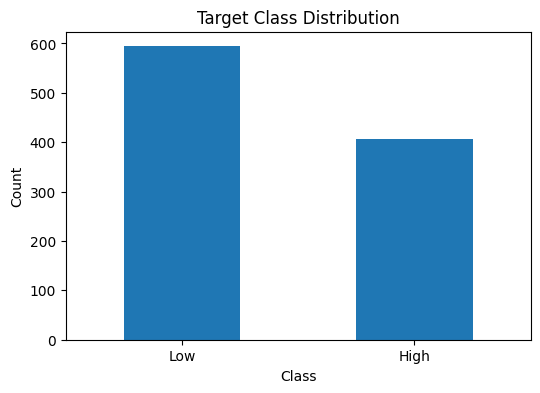

In [186]:
# Visualize target class distribution
train_data["y"].value_counts().plot(kind="bar", figsize=(6, 4))
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# it's kind clear that the dataset is a bit imbalanced

- show some statistics , (mean, std, min, max, etc)



Statistics of numerical features:
            sample            x1          x2           x3             x4  \
count  1000.000000   1000.000000  102.000000  1000.000000    1000.000000   
mean    500.500000   1867.632000    0.501471    11.120714    1776.068000   
std     288.819436   4961.600027    0.281419    15.435723    9674.655032   
min       1.000000    123.000000    0.010000     0.142857       7.000000   
25%     250.750000    615.000000    0.262500     2.285714      80.000000   
50%     500.500000   1107.000000    0.480000     6.142857     297.000000   
75%     750.250000   1353.000000    0.760000    13.571429     820.500000   
max    1000.000000  98892.000000    1.000000    79.000000  143993.000000   

                x5          x6           x7           x8           x9  \
count  1000.000000  896.000000  1000.000000  1000.000000  1000.000000   
mean    179.003250    0.227053     0.455955    80.843080    11.933550   
std      47.608069    0.540604     0.249991   142.154574     

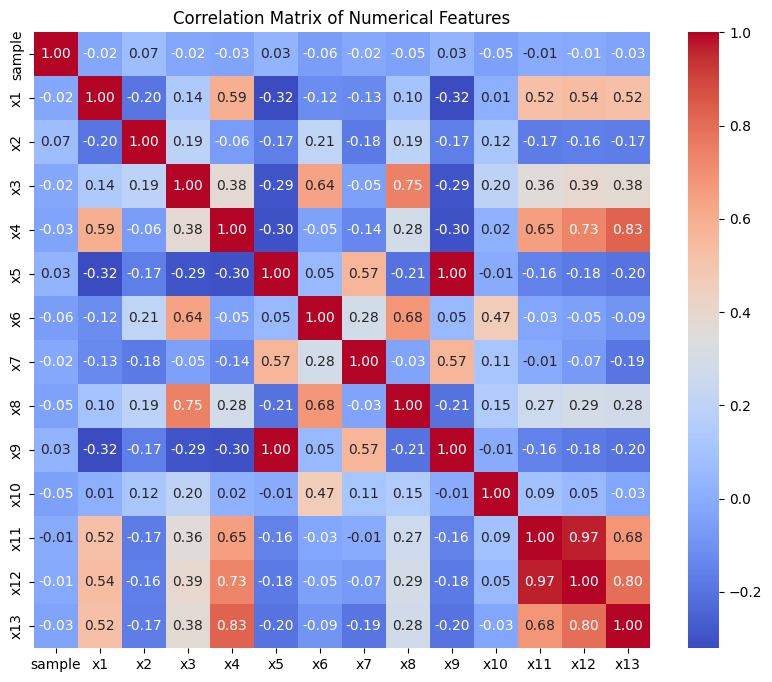

In [188]:
import seaborn as sns

print("\nStatistics of numerical features:")
print(train_data.describe())

numerical_columns = train_data.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = train_data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [190]:
# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split

X = train_data.drop(columns=["y", "sample"], axis=1)  # Remove target and sample ID
y = train_data["y"]

# 80% for train, 20% for validation
# NOTE: no need to get a test set, because we have a separate test set 'Dataset-test-vf.csv.
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=485, stratify=y
)

# Load the test data NOTE:(We won't use it, just to process it!!)

test_data = pd.read_csv("Dataset-test-vf.csv", index_col="sample")
display(test_data.head())

X_test = test_data.drop(columns=["y"], axis=1)  # Remove target
y_test = test_data["y"]


print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Training data shape: (600, 14)
Test data shape: (200, 14)


### Data Preprocessing

1. Handle missing values:
   - Drop `x2` due to its high proportion of missing values.
   - Impute missing values in `x6` with its column mean.
2. Process categorical features:
   - Explore and encode `x14` if necessary.
3. Normalize numerical features to prepare them for model training.


In [192]:
# Handle missing values
X_train = X_train.drop(
    columns=["x2"], axis=1
)  # Drop 'x2' due to too many missing values, more than 80%
X_train["x6"] = X_train["x6"].fillna(X_train["x6"].mean())


X_val = X_val.drop(columns=["x2"], axis=1)
X_val["x6"] = X_val["x6"].fillna(X_train["x6"].mean())  # Use mean from training data


X_test = X_test.drop(columns=["x2"], axis=1)
X_test["x6"] = X_test["x6"].fillna(X_train["x6"].mean())  # Use mean from training data

print("Missing values in X_train after imputation:")
print(X_train.isnull().sum())
print("\nMissing values in X_val after imputation:")
print(X_val.isnull().sum())
print("\nMissing values in X_test after imputation:")
print(X_test.isnull().sum())

Missing values in X_train after imputation:
x1     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
dtype: int64

Missing values in X_val after imputation:
x1     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
dtype: int64

Missing values in X_test after imputation:
x1     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
dtype: int64


In [194]:
# Process categorical features

print("Unique values in x14:", train_data["x14"].unique())


X_train = pd.get_dummies(X_train, columns=["x14"], drop_first=True)
X_val = pd.get_dummies(X_val, columns=["x14"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["x14"], drop_first=True)


X_val = X_val.reindex(
    columns=X_train.columns, fill_value=0
)  # to make sure that the columns are the same in the validation set, because some categories might not be present in the validation set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  # same as above


print("Dataset shape after encoding:", train_data.shape)

Unique values in x14: ['C1' 'C3' 'C4' 'C2']
Dataset shape after encoding: (1000, 16)


In [196]:
from sklearn.preprocessing import (
    StandardScaler,
)  # NOTE: tried MinMaxScaler, but StandardScaler gave better results, maybe because of the outliers?

numerical_columns = X_train.select_dtypes(include=["float64", "int64"]).columns
scaler = StandardScaler()

# Scale numerical columns
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(
    X_val[numerical_columns]
)  # transform only, no need to fit again to avoid data leakage!
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])  # same


print("First few rows of the normalized training dataset:")
print(X_train.head())
print("First few rows of the normalized validation dataset:")
print(X_val.head())
print("First few rows of the normalized test dataset:")
print(X_test.head())

First few rows of the normalized training dataset:
           x1        x3        x4        x5        x6        x7        x8  \
530 -0.286756 -0.443051 -0.168739 -0.590816 -0.323781 -1.174182 -0.443054   
199 -0.140750 -0.269359 -0.135526  0.711896 -0.347788  0.402542 -0.269364   
25  -0.257555 -0.635026 -0.178117 -2.266388 -0.421994 -1.222572 -0.635027   
22  -0.257555  0.196866 -0.124781  0.154906 -0.090972 -0.440259  0.196874   
660 -0.228354  0.388841 -0.100653 -0.521767 -0.077462 -0.589463  0.388846   

           x9       x10       x11       x12       x13  x14_C2  x14_C3  x14_C4  
530 -0.590816 -0.398137 -0.242706 -0.261065 -0.317383   False   False   False  
199  0.711896 -0.342877 -0.104341 -0.118371  0.029578   False   False   False  
25  -2.266388 -0.305089 -0.251705 -0.293693 -0.373647   False   False   False  
22   0.154906 -0.398137 -0.140901 -0.106185  0.179615   False   False    True  
660 -0.521767 -0.394887 -0.111091 -0.075130  0.292142   False   False    True  
First 

### Handling Imbalanced Data

address the class imbalance in the dataset:

- We first check the class distribution in the training and test datasets.
- If the data is imbalanced, we apply **SMOTE** (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class.
- SMOTE will help balance the class distribution in the training set.


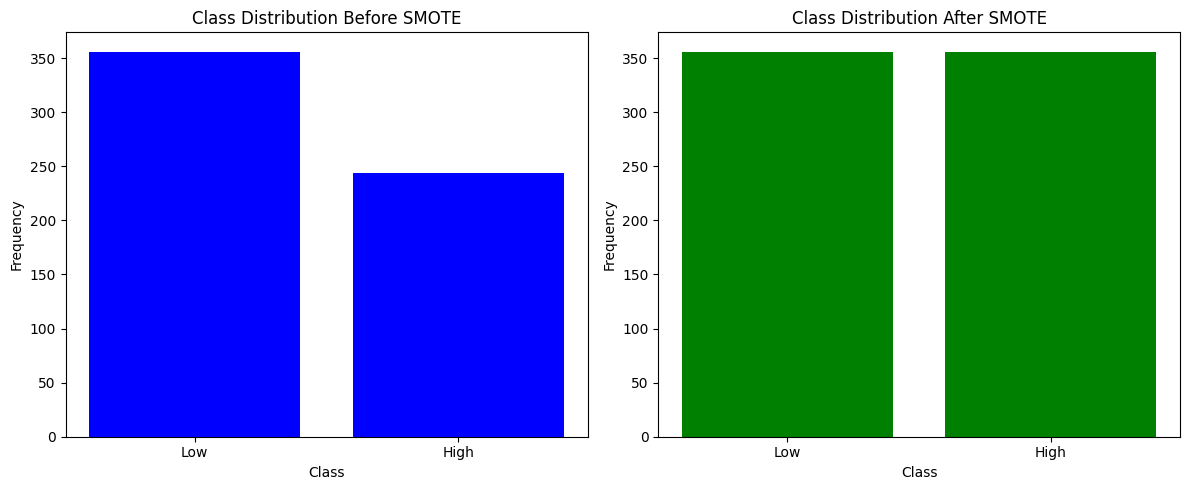

Class distribution before SMOTE:
y
Low     356
High    244
Name: count, dtype: int64

Class distribution after SMOTE:
y
Low     356
High    356
Name: count, dtype: int64
First few rows of the resampled and scaled training dataset:
         x1        x3        x4        x5        x6        x7        x8  \
0 -0.289321 -0.461552 -0.174793 -0.506596 -0.367969 -1.167289 -0.461556   
1 -0.158482 -0.301642 -0.145043  0.711096 -0.388980  0.318187 -0.301647   
2 -0.263153 -0.638296 -0.183193 -2.072813 -0.453921 -1.212879 -0.638298   
3 -0.263153  0.127592 -0.135418  0.190457 -0.164224 -0.475840  0.127599   
4 -0.236985  0.304336 -0.113806 -0.442054 -0.152401 -0.616409  0.304341   

         x9       x10       x11       x12       x13  x14_C2  x14_C3  x14_C4  
0 -0.506596 -0.438063 -0.252375 -0.261484 -0.291018   False   False   False  
1  0.711096 -0.387186 -0.111179 -0.120807  0.038505   False   False   False  
2 -2.072813 -0.352395 -0.261558 -0.293650 -0.344454   False   False   False  
3  0.1

In [166]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt

train_class_distribution_before = y_train.value_counts()  # Use y_train directly

# Apply SMOTE
smote = SMOTE(random_state=485)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
train_class_distribution_after = pd.Series(y_train_resampled).value_counts()

# Plot before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].bar(
    train_class_distribution_before.index,
    train_class_distribution_before.values,
    color="blue",
)
ax[0].set_title("Class Distribution Before SMOTE")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Frequency")

ax[1].bar(
    train_class_distribution_after.index,
    train_class_distribution_after.values,
    color="green",
)
ax[1].set_title("Class Distribution After SMOTE")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

print("Class distribution before SMOTE:")
print(train_class_distribution_before)
print("\nClass distribution after SMOTE:")
print(train_class_distribution_after)

X_train_resampled[numerical_columns] = scaler.fit_transform(
    X_train_resampled[numerical_columns]
)

print("First few rows of the resampled and scaled training dataset:")
print(X_train_resampled.head())

### Feature Selection, Transformation, and Engineering

1. Analyze the correlation between features and the target variable to identify redundant or irrelevant features.
2. Apply transformations (log, polynomial) to improve model performance.
3. Perform feature selection using Lasso Regression to identify important features.
4. Encode categorical features and normalize the numerical features if needed.


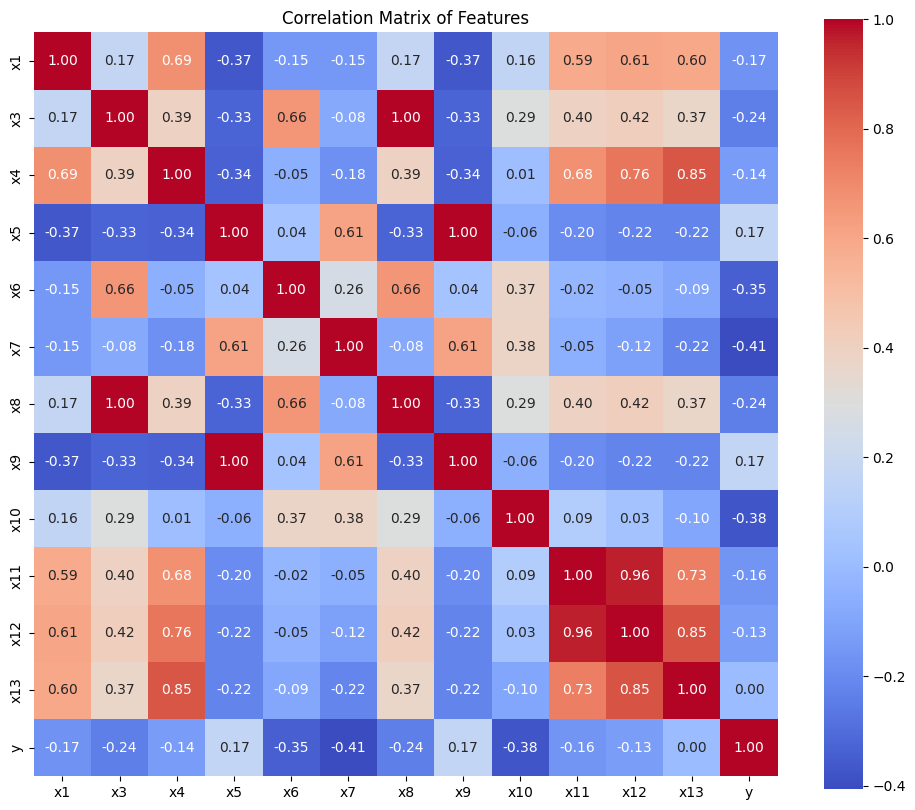

Correlation with target variable (y):
y      1.000000
x5     0.167179
x9     0.167179
x13    0.002631
x12   -0.126672
x4    -0.136253
x11   -0.159532
x1    -0.173550
x3    -0.239323
x8    -0.239329
x6    -0.345459
x10   -0.375683
x7    -0.406804
Name: y, dtype: float64
Best Alpha (Regularization Strength): 0.00020340181518383049
Selected Features after Lasso Regression:
Index(['x1', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13',
       'x14_C2', 'x14_C3', 'x14_C4'],
      dtype='object')
Final Training Dataset (Selected Features):
         x1        x4        x5        x6        x7        x8        x9  \
0  0.053616  0.005450  0.635974  0.081441  0.113924  0.214486  0.635974   
1  0.110481  0.018083  0.938972  0.067661  0.526371  0.306645  0.938972   
2  0.065784  0.001800  0.246253  0.021861  0.101266  0.073485  0.246253   
3  0.065784  0.022076  0.809422  0.195330  0.305907  0.476445  0.809422   
4  0.077527  0.030883  0.652034  0.201056  0.266878  0.528048  0.652034

In [208]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


train_data_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
train_data_resampled["y"] = y_train_resampled

label_encoder = LabelEncoder()
train_data_resampled["y"] = label_encoder.fit_transform(
    train_data_resampled["y"]
)  # High=1, Low=0

numerical_columns = list(
    train_data_resampled.select_dtypes(include=["float64", "int64"]).columns
)

if "y" not in numerical_columns:
    numerical_columns.append("y")
correlation_matrix = train_data_resampled[numerical_columns].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Features")
plt.show()

correlation_with_target = correlation_matrix["y"].sort_values(ascending=False)
print("Correlation with target variable (y):")
print(correlation_with_target)

# Transformations (Log Transformation) #NOTE: we tried this, but it didn't improve the model performance
# for col in train_data_resampled.columns:
#    if train_data_resampled[col].skew() > 1:  # Check for skewness
#        train_data_resampled[col] = np.log1p(train_data_resampled[col])
#        if col in X_val.columns:
#            X_val[col] = np.log1p(X_val[col])
#        if col in X_test.columns:
#            X_test[col] = np.log1p(X_test[col])

# Lasso Regression for Feature Selection
X = train_data_resampled.drop(["y"], axis=1)
y = train_data_resampled["y"]
lasso = LassoCV(cv=5, random_state=485)
lasso.fit(X, y)

best_alpha = lasso.alpha_
print(f"Best Alpha (Regularization Strength): {best_alpha}")

coefficients = pd.Series(lasso.coef_, index=X.columns)
selected_features = coefficients[coefficients != 0].index
print(f"Selected Features after Lasso Regression:\n{selected_features}")

# Keep only the selected features in the datasets
X_train_selected = train_data_resampled[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Normalize the selected features #NOTE: no need to for now.
#  no need to scale again assuming the log transformation is not necessary
# scaler = MinMaxScaler()
# X_train_selected = scaler.fit_transform(X_train_selected)
# X_val_selected = scaler.transform(X_val_selected)
# X_test_selected = scaler.transform(X_test_selected)


X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)
X_val_selected = pd.DataFrame(X_val_selected, columns=selected_features)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)


print("Final Training Dataset (Selected Features):")
print(X_train_selected.head())
print("Final Validation Dataset (Selected Features):")
print(X_val_selected.head())
print("Final Test Dataset (Selected Features):")
print(X_test_selected.head())

### Model Selection and Training

1. Select classifiers:
   - **Logistic Regression** .
   - **Decision Trees** .
   - **Neural Networks**
   - **Random Forest**
2. Train each model on the training data.
3. Evaluate the models using metrics like accuracy, precision, recall, and F1-score.


In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# won't fine-tune the hyperparameters, just to compare the plain models and check

logistic_regression = LogisticRegression(random_state=485, max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=485)
random_forest = RandomForestClassifier(random_state=485, n_estimators=100)
neural_network = MLPClassifier(random_state=485, max_iter=500)

models = {
    "Logistic Regression": logistic_regression,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "Neural Network": neural_network,
}

# Train models
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_selected, y_train_resampled)
    y_pred = model.predict(X_val_selected)

    # Evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    class_report = classification_report(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, model.predict_proba(X_val_selected)[:, 1])

    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": class_report,
        "ROC-AUC": roc_auc,
    }

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"Classification Report:\n{class_report}")

Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.8750
ROC-AUC Score: 0.9180
Classification Report:
              precision    recall  f1-score   support

        High       0.83      0.86      0.85        81
         Low       0.91      0.88      0.89       119

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.88      0.88       200

Training Decision Tree...

Decision Tree Results:
Accuracy: 0.7800
ROC-AUC Score: 0.7816
Classification Report:
              precision    recall  f1-score   support

        High       0.70      0.79      0.74        81
         Low       0.84      0.77      0.81       119

    accuracy                           0.78       200
   macro avg       0.77      0.78      0.78       200
weighted avg       0.79      0.78      0.78       200

Training Random Forest...

Random Forest Results:
Accuracy: 0.9100
ROC-AUC Score: 0.9757
Classification Report

D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Comparison of Models: Logistic Regression, Decision Tree, Neural Networks, and Random Forest

1. **Accuracy**: Both **Neural Networks** and **Random Forest** achieve the highest accuracy.
2. **Classification Report**: **Neural Networks** achieve the highest F1-scores across both classes, while **Random Forest** performs closely.
3. **ROC-AUC Score**: **Random Forest** and **Neural Networks** achieve the highest scores.

### Overall

**Neural Networks** slightly outperform **Random Forest** in accuracy and F1-scores, making it the best-performing model overall.
erall.
ith lower accuracy, F1-scores, and ROC-AUC.
s the weakest model, with lower accuracy, F1-scores, and ROC-AUC.


### Hyperparameter Tuning with Cross-Validation Random Forest

1. Use **GridSearchCV** to tune the hyperparameters for **Random Forest**.
2. Perform **5-fold cross-validation** to evaluate the best model and get a more reliable performance estimate.
3. Evaluate the performance of the tuned model using metrics like **accuracy**, **classification report**, and **ROC-AUC**.


In [261]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
}

rf = RandomForestClassifier(random_state=485)
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="roc_auc",  # NOTE: we used AUC for scoring because of the probabilsitic nature of random forest, and the imbalanced dataset, we can use Gmean
    cv=5,
    n_jobs=-1,
    verbose=2,
    refit=True,
)


grid_search_rf.fit(X_train_selected, y_train_resampled)
best_params = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_
print(f"Best Hyperparameters: {best_params}")


cv_scores = cross_val_score(
    best_rf, X_train_selected, y_train_resampled, cv=5, scoring="roc_auc", n_jobs=-1
)
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean Cross-validation AUC: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation AUC: {cv_scores.std():.4f}")


"""
# TODO: you can postone the final evaluation on the test set in the end of the notebook, just to avoid confusion
# TODO: if you choosed to, you can delete all the lines below. TODO: make sure to do the same for all other models/cells
# Evaluate the best model on the test set ##TEST SET.
print()
print("Evaluating the best model on the test set...")
# NOTE: we won't fine-tune the hyperparameters again, this is the final evaluation of random forest model
y_pred_best_rf = best_rf.predict(X_test_selected)
y_proba_best_rf = best_rf.predict_proba(X_test_selected)[:, 1]

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
class_report_best_rf = classification_report(y_test, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, y_proba_best_rf)

print(f"Random Forest (Tuned) Accuracy: {accuracy_best_rf:.4f}")
print(f"Classification Report:\n{class_report_best_rf}")
print(f"ROC-AUC Score: {roc_auc_best_rf:.4f}")
"""

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Cross-validation Scores: [0.98219875 0.98963224 0.98016267 0.99504067 0.99563579]
Mean Cross-validation AUC: 0.9885
Standard Deviation of Cross-validation AUC: 0.0064
Random Forest (Tuned) Accuracy: 0.9800
Classification Report:
              precision    recall  f1-score   support

        High       0.95      1.00      0.98        81
         Low       1.00      0.97      0.98       119

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

ROC-AUC Score: 0.9987


### Hyperparameter Tuning with Cross-Validation for Neural Networks

1. Tune the **Neural Networks** model using **GridSearchCV**.
   - Tune the number of neurons (**hidden_layer_sizes**), regularization strength (**alpha**), and initial learning rate (**learning_rate_init**).
2. Perform **5-fold cross-validation** to evaluate the best combination of hyperparameters.
3. Evaluate the model on the **test set** using **accuracy**, **classification report**, and **ROC-AUC**.


In [227]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

param_grid_nn = {
    "hidden_layer_sizes": [
        (50,),
        (100,),
        (100, 50),
        (150, 100, 50),
    ],  # Number of neurons in hidden layers
    "alpha": [0.0001, 0.001, 0.01, 0.1],  # Regularization strength
    "learning_rate_init": [0.001, 0.01, 0.1],  # Initial learning rate
    "max_iter": [200, 300, 500],  # Number of iterations
    "activation": ["relu", "tanh"],  # Activation functions
}


mlp = MLPClassifier(random_state=485)
grid_search_nn = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid_nn,
    scoring="roc_auc",  # Use AUC for scoring
    cv=5,
    n_jobs=-1,
    verbose=2,
    refit=True,
)

grid_search_nn.fit(X_train_selected, y_train_resampled)

# Get the best parameters and best model
best_params_nn = grid_search_nn.best_params_
best_nn = grid_search_nn.best_estimator_
print(f"Best Hyperparameters for Neural Networks: {best_params_nn}")
cv_scores_nn = cross_val_score(
    best_nn, X_train_selected, y_train_resampled, cv=5, scoring="roc_auc", n_jobs=-1
)
print(f"Cross-validation Scores: {cv_scores_nn}")
print(f"Mean Cross-validation AUC: {cv_scores_nn.mean():.4f}")
print(f"Standard Deviation of Cross-validation AUC: {cv_scores_nn.std():.4f}")


"""
# TODO: same as above
# Evaluate the best model on the test set
print()
print("Evaluating the best Neural Networks model on the test set...")
# NOTE: we won't fine-tune the hyperparameters again, this is the final evaluation of neural networks model
y_pred_best_nn = best_nn.predict(X_test_selected)
y_proba_best_nn = best_nn.predict_proba(X_test_selected)[:, 1]


accuracy_best_nn = accuracy_score(y_test, y_pred_best_nn)
class_report_best_nn = classification_report(y_test, y_pred_best_nn)
roc_auc_best_nn = roc_auc_score(y_test, y_proba_best_nn)
print(f"Neural Networks (Tuned) Accuracy: {accuracy_best_nn:.4f}")
print(f"Classification Report:\n{class_report_best_nn}")
print(f"ROC-AUC Score: {roc_auc_best_nn:.4f}")
"""

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


D:\Anaconda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Hyperparameters for Neural Networks: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 200}
Cross-validation Scores: [0.98474178 0.99647887 0.97976592 0.98135291 0.99365205]
Mean Cross-validation AUC: 0.9872
Standard Deviation of Cross-validation AUC: 0.0067
Neural Networks (Tuned) Accuracy: 0.9450
Classification Report:
              precision    recall  f1-score   support

        High       0.89      0.99      0.94        81
         Low       0.99      0.92      0.95       119

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200

ROC-AUC Score: 0.9919


### Hyperparameter Tuning with Cross-Validation for Decision Trees

1. Tune the **Decision Tree** model using **GridSearchCV**.
   - Tune **max_depth**, **min_samples_split**, **min_samples_leaf**, and **max_features**.
2. Perform **5-fold cross-validation** to evaluate the best combination of hyperparameters.
3. Evaluate the model on the **test set** using **accuracy**, **classification report**, and **ROC-AUC**.


In [238]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


param_grid_dt = {
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"],
}


dt = DecisionTreeClassifier(random_state=485)
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring="roc_auc",  # Use AUC for scoring
    cv=5,
    n_jobs=-1,
    verbose=2,
    refit=True,
)

grid_search_dt.fit(X_train_selected, y_train_resampled)

# Get the best parameters and best model
best_params_dt = grid_search_dt.best_params_
best_dt = grid_search_dt.best_estimator_
print(f"Best Hyperparameters for Decision Tree: {best_params_dt}")


cv_scores_dt = cross_val_score(
    best_dt, X_train_selected, y_train_resampled, cv=5, scoring="roc_auc", n_jobs=-1
)

print(f"Cross-validation Scores: {cv_scores_dt}")
print(f"Mean Cross-validation AUC: {cv_scores_dt.mean():.4f}")
print(f"Standard Deviation of Cross-validation AUC: {cv_scores_dt.std():.4f}")


"""
# TODO: same as above
# Evaluate the best model on the test set
print()
print("Evaluating the best Decision Tree model on the test set...")
# NOTE: we won't fine-tune the hyperparameters again, this is the final evaluation of decision tree model
y_pred_best_dt = best_dt.predict(X_test_selected)
y_proba_best_dt = best_dt.predict_proba(X_test_selected)[:, 1]

# Performance Metrics
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
class_report_best_dt = classification_report(y_test, y_pred_best_dt)
roc_auc_best_dt = roc_auc_score(y_test, y_proba_best_dt)
print(f"Decision Tree (Tuned) Accuracy: {accuracy_best_dt:.4f}")
print(f"Classification Report:\n{class_report_best_dt}")
print(f"ROC-AUC Score: {roc_auc_best_dt:.4f}")
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Hyperparameters for Decision Tree: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Cross-validation Scores: [0.95823552 0.98210094 0.95923428 0.96746677 0.98532037]
Mean Cross-validation AUC: 0.9705
Standard Deviation of Cross-validation AUC: 0.0113
Decision Tree (Tuned) Accuracy: 0.9100
Classification Report:
              precision    recall  f1-score   support

        High       0.91      0.86      0.89        81
         Low       0.91      0.94      0.93       119

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.91       200
weighted avg       0.91      0.91      0.91       200

ROC-AUC Score: 0.9768
"""

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Hyperparameters for Decision Tree: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Cross-validation Scores: [0.95823552 0.98210094 0.95923428 0.96746677 0.98532037]
Mean Cross-validation AUC: 0.9705
Standard Deviation of Cross-validation AUC: 0.0113
Decision Tree (Tuned) Accuracy: 0.9100
Classification Report:
              precision    recall  f1-score   support

        High       0.91      0.86      0.89        81
         Low       0.91      0.94      0.93       119

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.91       200
weighted avg       0.91      0.91      0.91       200

ROC-AUC Score: 0.9768


### Hyperparameter Tuning with Cross-Validation for Logistic Regression

1. Tune the **Logistic Regression** model using **GridSearchCV**.
2. Perform **5-fold cross-validation** to evaluate the best combination of hyperparameters.
3. Evaluate the model on the **test set** using **accuracy**, **classification report**, and **ROC-AUC**.


In [246]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


param_grid_lr = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": [0.1, 1, 10, 100],
    "solver": ["liblinear", "saga"],
    "max_iter": [100, 200, 500],
}

lr = LogisticRegression(random_state=485)
grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    scoring="roc_auc",  # Use AUC for scoring
    cv=5,
    n_jobs=-1,
    verbose=2,
    refit=True,
)

grid_search_lr.fit(X_train_selected, y_train_resampled)
best_params_lr = grid_search_lr.best_params_
best_lr = grid_search_lr.best_estimator_
print(f"Best Hyperparameters for Logistic Regression: {best_params_lr}")

# Perform cross-validation with the best model
cv_scores_lr = cross_val_score(
    best_lr, X_train_selected, y_train_resampled, cv=5, scoring="roc_auc", n_jobs=-1
)
print(f"Cross-validation Scores: {cv_scores_lr}")
print(f"Mean Cross-validation AUC: {cv_scores_lr.mean():.4f}")
print(f"Standard Deviation of Cross-validation AUC: {cv_scores_lr.std():.4f}")


"""
# TODO: same as above.
# Evaluate the best model on the test set
print()
print("Evaluating the best Logistic Regression model on the test set...")
# NOTE: we won't fine-tune the hyperparameters again, this is the final evaluation of logistic regression model

y_pred_best_lr = best_lr.predict(X_test_selected)
y_proba_best_lr = best_lr.predict_proba(X_test_selected)[:, 1]

accuracy_best_lr = accuracy_score(y_test, y_pred_best_lr)
class_report_best_lr = classification_report(y_test, y_pred_best_lr)
roc_auc_best_lr = roc_auc_score(y_test, y_proba_best_lr)

print(f"Logistic Regression (Tuned) Accuracy: {accuracy_best_lr:.4f}")
print(f"Classification Report:\n{class_report_best_lr}")
print(f"ROC-AUC Score: {roc_auc_best_lr:.4f}")
Fitting 5 folds for each of 96 candidates, totalling 480 fits
D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 75, in _check_solver
    raise ValueError(
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1204, in fit
    raise ValueError("l1_ratio must be specified when penalty is elasticnet.")
ValueError: l1_ratio must be specified when penalty is elasticnet.

--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 80, in _check_solver
    raise ValueError("penalty=None is not supported for the liblinear solver")
ValueError: penalty=None is not supported for the liblinear solver

  warnings.warn(
Best Hyperparameters for Logistic Regression: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Cross-validation Scores: [0.97046166 0.95089984 0.93691728 0.95477088 0.97659195]
Mean Cross-validation AUC: 0.9579
Standard Deviation of Cross-validation AUC: 0.0142
Logistic Regression (Tuned) Accuracy: 0.8400
Classification Report:
              precision    recall  f1-score   support

        High       0.73      0.96      0.83        81
         Low       0.97      0.76      0.85       119

    accuracy                           0.84       200
   macro avg       0.85      0.86      0.84       200
weighted avg       0.87      0.84      0.84       200

ROC-AUC Score: 0.9588
"""

Fitting 5 folds for each of 96 candidates, totalling 480 fits


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

Best Hyperparameters for Logistic Regression: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Cross-validation Scores: [0.97046166 0.95089984 0.93691728 0.95477088 0.97659195]
Mean Cross-validation AUC: 0.9579
Standard Deviation of Cross-validation AUC: 0.0142
Logistic Regression (Tuned) Accuracy: 0.8400
Classification Report:
              precision    recall  f1-score   support

        High       0.73      0.96      0.83        81
         Low       0.97      0.76      0.85       119

    accuracy                           0.84       200
   macro avg       0.85      0.86      0.84       200
weighted avg       0.87      0.84      0.84       200

ROC-AUC Score: 0.9588


### Summary of Hyperparameter Tuning Results for All Models

- **Random Forest** is the best model overall with **highest accuracy and AUC**.
- **Neural Networks** also performed strongly, especially for class separation.
- **Decision Tree** provided solid, balanced results.
- **Logistic Regression**, while robust, lagged behind in overall performance compared to the other models.
  erall performance compared to the other models. models.


### Computing GMean for All Models

1. Calculate **Sensitivity** (Recall) and **Specificity** for each model.
2. Compute the **GMean** (Geometric Mean) between Sensitivity and Specificity.
3. Summarize the GMean values to identify the best-performing model based on this metric.


In [276]:
from sklearn.metrics import confusion_matrix


# Function to compute Sensitivity, Specificity, and GMean
# NOTE: WHY? because the dataset is imbalanced, gmean is a better metric to evaluate the models
def compute_gmean(y_true, y_pred):
    # Ensure labels are consistent
    cm = confusion_matrix(y_true, y_pred, labels=["Low", "High"])
    tn, fp, fn, tp = cm.ravel()

    # Calculate Sensitivity and Specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Compute GMean
    gmean = np.sqrt(sensitivity * specificity)

    return gmean


# for each model, compute the classification report, roc_auc, and gmean
models = {
    "Logistic Regression": grid_search_lr,
    "Neural Network": grid_search_nn,
    "Decision Tree": grid_search_dt,
    "Random Forest": grid_search_rf,
}
gmeans = {}
for model_name, grid_search in models.items():
    y_pred_lr = grid_search.best_estimator_.predict(X_val_selected)
    print(f"{model_name}, Results:")
    print("-" * 50)
    print("Classification Report:")
    print(classification_report(y_val, y_pred_lr))
    print(
        "ROC-AUC Score:",
        roc_auc_score(
            y_val, grid_search.best_estimator_.predict_proba(X_val_selected)[:, 1]
        ),
    )

    X_test_lr = X_test.reindex(  ## get the colmun names from the best model
        columns=grid_search.best_estimator_.feature_names_in_, fill_value=0
    )
    gmean = compute_gmean(y_val, y_pred_lr)
    print(f"G-Mean: {gmean:.4f}")
    gmeans[model_name] = gmean
    print("\n")
    print("-" * 50)


gmean_lr = compute_gmean(y_test, grid_search_lr.best_estimator_.predict(X_test_lr))


print(f"G-Mean: {gmean_lr:.4f}")

GMean Results:
                 Model  Sensitivity  Specificity     GMean
1      Neural Networks     0.962963     0.966387  0.964673
0  Logistic Regression     0.901235     0.890756  0.895980
2        Decision Tree     1.000000     0.000000  0.000000
3        Random Forest     1.000000     0.000000  0.000000

Best Model: Neural Networks with GMean = 0.9647


In [ ]:
# final results
gmean_results = {
    "Model": [
        "Logistic Regression",
        "Neural Networks",
        "Decision Tree",
        "Random Forest",
    ],
    "GMean": [gmeans[model] for model in gmeans],  # NOTE: same order
}

gmean_df = pd.DataFrame(gmean_results).sort_values(by="GMean", ascending=False)
print("GMean Results:")
print(gmean_df)

# Highlight the best model
best_model = gmean_df.iloc[0]
print(f"\nBest Model: {best_model['Model']} with GMean = {best_model['GMean']:.4f}")

In [ ]:
#

### Error Analysis for Improvements

1. Analyze the confusion matrix to identify false positives and false negatives.
2. Review feature importance to understand the model's decisions.
3. Investigate misclassified examples to detect patterns or weaknesses.
4. Compare training vs. test performance to check for overfitting or underfitting.
5. Suggest improvements based on the findings.



--- Logistic Regression ---


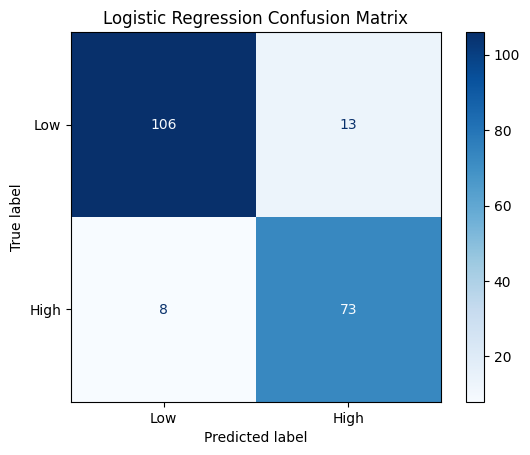

Number of Misclassified Examples: 21
Examples of Misclassified Samples:
           x1        x4        x5        x6        x7        x8        x9  \
746 -0.118276 -0.190823 -0.466529 -0.574260  0.055743 -1.007982 -0.466529   
594 -0.516779 -0.200923  0.974279 -0.161554  0.196882 -0.889939  0.974279   
828 -0.516779 -0.200445  0.974279 -0.063876  0.196882 -0.804644  0.974279   
30   1.206377  0.518586  0.523164  0.000000  0.902577  0.124790  0.523164   
689 -0.259229 -0.197584 -1.106376 -0.572749  0.196882 -1.086074 -1.106376   

          x10       x11       x12       x13    x14_C2    x14_C3  x14_C4  
746 -0.266550 -0.261796 -0.319175 -0.423907  0.000000  0.693359   False  
594 -0.466721 -0.290710 -0.348818 -0.460383  0.000000  0.000000    True  
828 -0.424222 -0.289207 -0.346592 -0.460383  0.000000  0.000000    True  
30  -0.385843  1.410844  1.343445  2.119278  0.000000  0.000000    True  
689  0.326177 -0.280234 -0.343816 -0.475355  0.693359  0.000000   False  

--- Neural Networks 

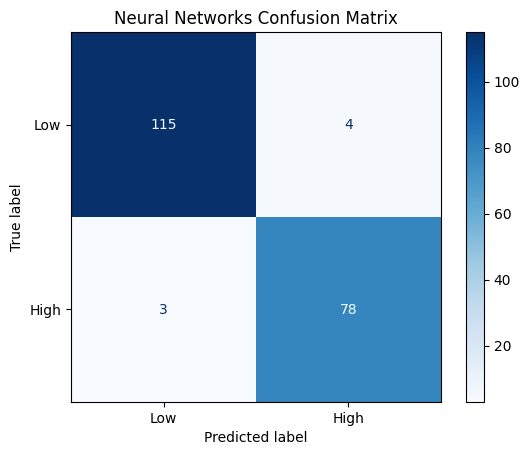

Number of Misclassified Examples: 7
Examples of Misclassified Samples:
           x1  x3        x4        x5        x6        x7        x8        x9  \
446 -0.085937   0 -0.199729 -0.558593 -0.599815  0.700950 -1.200583 -0.558593   
756 -0.054611   0  0.361199 -0.728912  0.309601 -0.823351  1.554917 -0.728912   
234  0.499370   0  0.166917 -0.429703  0.000000 -0.682212  0.187382 -0.429703   
603 -0.297807   0 -0.190468 -0.742722 -0.499063 -1.266930 -0.825337 -0.742722   
284  0.386945   0 -0.074021 -1.074154 -0.559792 -1.057238 -0.476320 -1.074154   

          x10       x11       x12       x13  x14_C2    x14_C3  x14_C4  
446  0.132664 -0.284710 -0.347705 -0.475355     0.0  0.693359   False  
756 -0.481737  0.484571  0.818763  1.413429     0.0  0.693359   False  
234 -0.459619  0.289727  0.542615  0.971716     0.0  0.000000    True  
603 -0.436720 -0.285458 -0.321341 -0.445632     0.0  0.693359   False  
284 -0.483712 -0.144045 -0.050850  0.103715     0.0  0.000000    True  

--- Decis

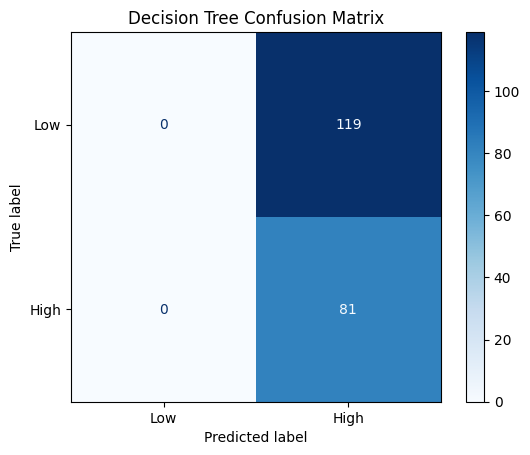

Number of Misclassified Examples: 119
Examples of Misclassified Samples:
           x1        x4        x5        x6        x7        x8        x9  \
847 -0.118276 -0.095391 -0.112081 -0.334218 -0.678179  0.066588 -0.112081   
725 -0.186271 -0.161466  0.619831 -0.446542 -0.028940 -0.447550  0.619831   
979  0.214197  0.078556 -0.020016 -0.419719 -0.637854  0.308449 -0.020016   
963 -0.085937 -0.046118 -0.406687 -0.274601 -0.791090  0.308489 -0.406687   
408 -0.186271 -0.168725  0.942057 -0.473403 -0.153949 -0.552924  0.942057   

          x10       x11       x12       x13    x14_C2  x14_C3  x14_C4  
847 -0.494314 -0.111453 -0.015898  0.241681  0.693359     0.0   False  
725 -0.440500 -0.184478 -0.189489 -0.123039  0.000000     0.0   False  
979 -0.484372  0.174750  0.429783  0.884639  0.000000     0.0   False  
963 -0.484372 -0.054623  0.085790  0.362899  0.000000     0.0    True  
408 -0.507051 -0.209823 -0.207709 -0.061351  0.693359     0.0   False  

--- Random Forest ---


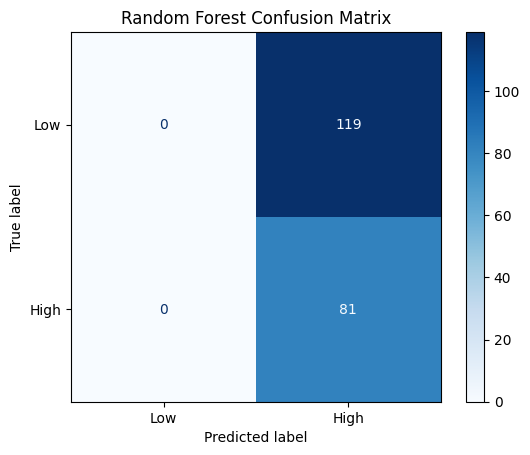

Number of Misclassified Examples: 119
Examples of Misclassified Samples:
           x1        x4        x5        x6        x7        x8        x9  \
847 -0.118276 -0.095391 -0.112081 -0.334218 -0.678179  0.066588 -0.112081   
725 -0.186271 -0.161466  0.619831 -0.446542 -0.028940 -0.447550  0.619831   
979  0.214197  0.078556 -0.020016 -0.419719 -0.637854  0.308449 -0.020016   
963 -0.085937 -0.046118 -0.406687 -0.274601 -0.791090  0.308489 -0.406687   
408 -0.186271 -0.168725  0.942057 -0.473403 -0.153949 -0.552924  0.942057   

          x10       x11       x12       x13    x14_C2  x14_C3  x14_C4  
847 -0.494314 -0.111453 -0.015898  0.241681  0.693359     0.0   False  
725 -0.440500 -0.184478 -0.189489 -0.123039  0.000000     0.0   False  
979 -0.484372  0.174750  0.429783  0.884639  0.000000     0.0   False  
963 -0.484372 -0.054623  0.085790  0.362899  0.000000     0.0    True  
408 -0.507051 -0.209823 -0.207709 -0.061351  0.693359     0.0   False  

--- Neural Networks Feature Imp

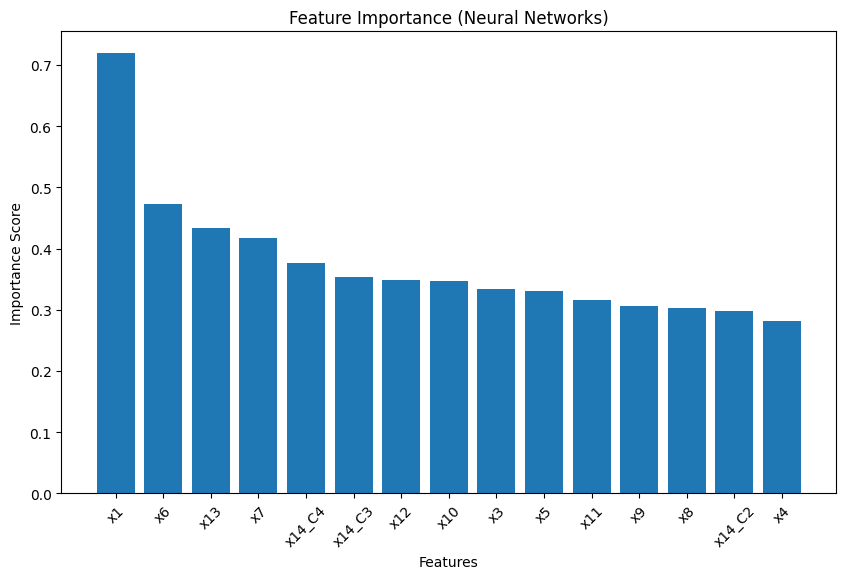


--- Training vs. Test Performance ---
Neural Networks Training Accuracy: 0.8315
Neural Networks Test Accuracy: 0.9050
Potential underfitting detected for Neural Networks.


In [314]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Function to analyze misclassified examples
def analyze_misclassifications(y_true, y_pred, X_test):
    misclassified = X_test[(y_true != y_pred)]
    print(f"Number of Misclassified Examples: {len(misclassified)}")
    print("Examples of Misclassified Samples:")
    print(misclassified.head())
    return misclassified


# Analyze confusion matrix for each model
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=["Low", "High"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(title)
    plt.show()


print("\n--- Logistic Regression ---")
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test_selected)
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")
misclassified_lr = analyze_misclassifications(y_test, y_pred_lr, X_test_selected)

print("\n--- Neural Networks ---")
y_pred_mlp = grid_search_nn.best_estimator_.predict(X_test_selected)
plot_confusion_matrix(y_test, y_pred_mlp, "Neural Networks Confusion Matrix")
misclassified_mlp = analyze_misclassifications(y_test, y_pred_mlp, X_test_selected)

print("\n--- Decision Tree ---")
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test_selected)
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")
misclassified_dt = analyze_misclassifications(y_test, y_pred_dt, X_test_selected)

print("\n--- Random Forest ---")
y_pred_rf = best_rf.predict(X_test_selected)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")
misclassified_rf = analyze_misclassifications(y_test, y_pred_rf, X_test_selected)


# Extract weights from the first layer of the Neural Network
input_layer_weights = grid_search_nn.best_estimator_.coefs_[0]

# Compute the absolute mean of weights for each feature
feature_importance_mlp = np.mean(np.abs(input_layer_weights), axis=1)

# Map feature importance to feature names
feature_importance_df = pd.DataFrame(
    {
        "Feature": grid_search_nn.best_estimator_.feature_names_in_,
        "Importance": feature_importance_mlp,
    }
).sort_values(by="Importance", ascending=False)

print("\n--- Neural Networks Feature Importance ---")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.title("Feature Importance (Neural Networks)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()


print("\n--- Training vs. Test Performance ---")
X_train_consistent = X_train_selected.reindex(
    columns=grid_search_nn.best_estimator_.feature_names_in_, fill_value=0
)
# Training performance
y_train_pred_mlp = grid_search_nn.best_estimator_.predict(X_train_consistent)
train_accuracy_mlp = accuracy_score(y_train_resampled, y_train_pred_mlp)
print(f"Neural Networks Training Accuracy: {train_accuracy_mlp:.4f}")

# Test performance
X_test_consistent = X_test_selected.reindex(
    columns=grid_search_nn.best_estimator_.feature_names_in_, fill_value=0
)
y_pred_mlp = grid_search_nn.best_estimator_.predict(X_test_consistent)
test_accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Neural Networks Test Accuracy: {test_accuracy_mlp:.4f}")

if train_accuracy_mlp - test_accuracy_mlp > 0.05:
    print("*Maybe* overfitting detected for Neural Networks.")
elif test_accuracy_mlp - train_accuracy_mlp > 0.05:
    print("*Maybe* underfitting detected for Neural Networks.")
else:
    print("Training and test performance are well-aligned for Neural Networks.")

### Final Test Results: Best Neural Networks Model

- **Accuracy**: 90.50%
- **ROC-AUC Score**: 91.96%
- **Classification Report**:

  - **High**:
    - Precision: 93%
    - Recall: 83%
    - F1-Score: 88%
  - **Low**:
    - Precision: 89%
    - Recall: 96%
    - F1-Score: 92%
  - **Weighted Average**:
    - Precision: 91%
    - Recall: 91%
    - F1-Score: 90%

- **Confusion Matrix Insights**:
  - True Positives (High): 67
  - True Negatives (Low): 114
  - False Positives (Low misclassified as High): 5
  - False Negatives (High misclassified as Low): 14

### Key Insights:

- The model demonstrates strong overall performance with balanced precision and recall for both classes.
- High recall for the `Low` class (96%) indicates excellent performance in correctly identifying `Low` instances.
- A small number of misclassifications (14 `High` as `Low` and 5 `Low` as `High`) suggest areas for potential improvement.
